### Principe algorithmique

Algorithme K-means

Entrée : 

    K le nombre de cluster à former
    Le Training Set (matrice de données)

DEBUT

Choisir aléatoirement K points (une ligne de la matrice de données). Ces points sont les centres des clusters (nommé centroïd).

                      REPETER

Affecter chaque point (élément de la matrice de donnée) au groupe dont il est le plus proche au son centre

Recalculer le centre de chaque cluster  et modifier le centroide

                     JUSQU‘A     CONVERGENCE

                               OU    (stabilisation de l’inertie totale de la population)

FIN ALGORITHME

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math
import random


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 5)

,normalized_age,normalized_salary
0,0.680267,-0.016342
1,3.809518,0.798483
2,-1.661372,-0.577667
3,-0.257307,-0.155552
4,0.698017,0.174561
...,...,...
995,-5.060165,2.482045
996,-5.079404,2.773580
997,-5.861520,3.068426
998,-5.018934,3.110904


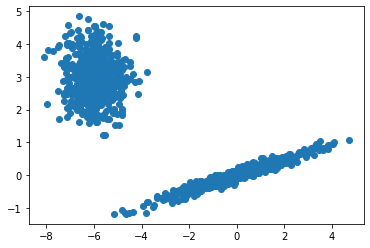

In [2]:
df = pd.read_csv("/Users/Johanna/Documents/SIMPLON DATA IA/IA/ML NON SUPERVISE/data/dataset_1.csv")
df.drop(["Unnamed: 0"], axis = 1, inplace=True)
df
plt.scatter(df.normalized_age, df.normalized_salary)

In [3]:
# https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
"""
class sklearn.cluster.KMeans
(n_clusters=8, *, init='k-means++', 
n_init=10, max_iter=300, tol=0.0001, 
precompute_distances='deprecated', 
verbose=0, random_state=None, copy_x=True, 
n_jobs='deprecated', algorithm='auto')
"""


"\nclass sklearn.cluster.KMeans\n(n_clusters=8, *, init='k-means++', \nn_init=10, max_iter=300, tol=0.0001, \nprecompute_distances='deprecated', \nverbose=0, random_state=None, copy_x=True, \nn_jobs='deprecated', algorithm='auto')\n"

In [96]:
"""
K-MEAN
Objectif: Assigner à les éléments aux groupes
- Choisir le nombre de cluster K
- Choisir K elements initiaux 'centres' des K groupes
- Placer les objets dans le groupe de centre le plus proche
- Recalculer le centre de gravité de chaque groupe
- Itérer l'algorythme jusqu'à que les objets ne changent plus de groupe (while)
"""

df.sort_values(by=['normalized_age', 'normalized_salary'], inplace=True)
cluster_array = np.array(df)

cluster_array.shape
m = cluster_array.shape[0] # nombre de ligne (exemple)
n = cluster_array.shape[1] # nombre de colonne (feature)

"\nK-MEAN\nObjectif: Assigner à les éléments aux groupes\n- Choisir le nombre de cluster K\n- Choisir K elements initiaux 'centres' des K groupes\n- Placer les objets dans le groupe de centre le plus proche\n- Recalculer le centre de gravité de chaque groupe\n- Itérer l'algorythme jusqu'à que les objets ne changent plus de groupe (while)\n"

(1000, 2)

### Euclidean distance

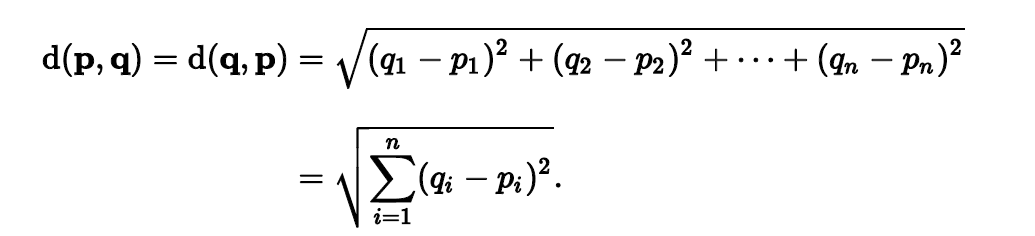

In [97]:
from math import sqrt

first_column = df.iloc[:,0]
second_column = df.iloc[:,1]

def Euclidean_distance(first_column, second_column):
    squared_distance = 0
    for i in range(len(first_column)): # with len(first_column)=len(second_column)
        squared_distance += (first_column[i] - second_column[i])**2
    ed = sqrt(squared_distance)
    ed= round(ed,3)
    return ed

Euclidean_distance(first_column, second_column)

204.237

### Clustering

In [98]:
m = cluster_array.shape[0] # nombre de ligne (exemple)
n = cluster_array.shape[1] # nombre de colonne (feature)

def choix_clusters(centroids, cluster_array):
    clusters = []
    for i in range(m):
        distances = []
        for centroid in centroids:
            distances.append(Euclidean_distance(centroid, cluster_array[i]))
            cluster = [z for z, val in enumerate(distances) if val==min(distances)]
            #print(cluster)
        clusters.append(cluster[0])
    return clusters

In [99]:
# Calcul des nouveaux centroids pour chaque clusters

def new_calc_centroids(clusters, cluster_array):
    new_centroids = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array), pd.DataFrame(clusters, columns = ['cluster'])], axis=1)
    print(cluster_df)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_centroids.append(cluster_mean)
    return new_centroids


In [100]:
k = 2
centroids = [cluster_array[i+2] for i in range(k)]
clusters = choix_clusters(centroids, cluster_array)

choix_clusters(centroids, cluster_array)
new_calc_centroids(clusters, cluster_array)
centroids

[0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


            0         1  cluster
0   -8.096229  3.616656        0
1   -7.961542  2.168103        1
2   -7.944151  3.806214        0
3   -7.706295  3.780447        1
4   -7.525252  2.559245        1
..        ...       ...      ...
995  3.836430  0.918456        1
996  3.977362  0.931337        1
997  4.047267  0.955875        1
998  4.101171  1.015263        1
999  4.690904  1.055631        1

[1000 rows x 3 columns]


[0   -8.020190
 1    3.711435
 dtype: float64, 0   -3.003680
 1    1.495677
 dtype: float64]

[array([-7.9441514 ,  3.80621378]), array([-7.70629505,  3.78044719])]

### Variance
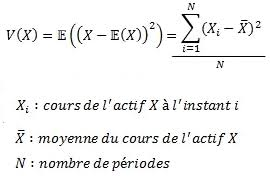

In [101]:
# Calcul de la variance de chaque cluster
# À quel point les observations au sein d'un cluster sont similaires ou dissemblables.
import numpy.matlib

def centroid_var(clusters, cluster_array):
    sum_squares = []
    cluster_df = pd.concat([pd.DataFrame(cluster_array), pd.DataFrame(clusters, columns = ['cluster'])], axis=1)
    for c in set(cluster_df['cluster']):
        current_cluster = cluster_df[cluster_df['cluster']==c][cluster_df.columns[:-1]]
        cluster_mean =  current_cluster.mean(axis=0)
        ####
    return sum_squares